# Analysis - Mempool algorithm

Analysis of the newly introduced mempool algorithm.

In [2]:
%pylab inline
import pandas as pd
import numpy as np

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

Populating the interactive namespace from numpy and matplotlib


In [24]:
def preprocess(df):
    df = df.replace(-1.00, np.nan)
    df = df.sort_values(by=['block_number'])
    return df

dfmempool = pd.read_csv('data/feeestimation/mempoolscores2019-01-11.csv')
dfmempool = preprocess(dfmempool)

In [25]:
avg_ratestandard = dfmempool["priceStandard"].mean()
std_ratestandard = dfmempool["priceStandard"].std()
print("The average standard fee-per-byte-rate is: " + str(avg_ratestandard) + " Satoshi per byte. std: " + str(std_ratestandard))


The average standard fee-per-byte-rate is: 16.870008875739646 Satoshi per byte. std: 13.96573984935923


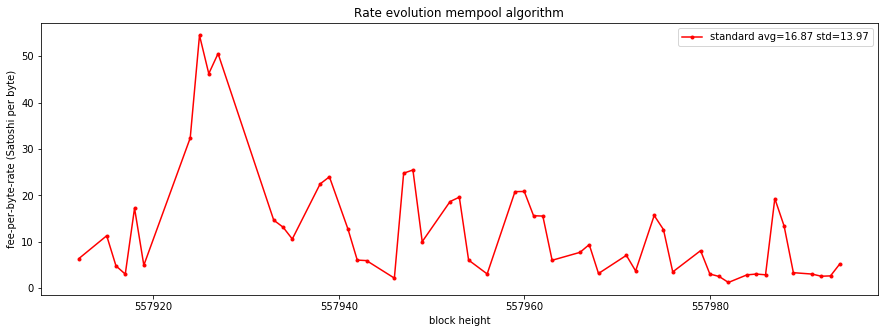

In [30]:
groupedMempool = dfmempool.groupby(['block_number']).mean().reset_index()

import matplotlib.pyplot as plt

x = groupedMempool["block_number"].values
y2 = groupedMempool["priceStandard"].values

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.plot(x,y2, c='r', marker='.', label='standard avg=' +'{:0.2f}'.format(avg_ratestandard) + ' std='+'{:0.2f}'.format(std_ratestandard))

plt.xlabel('block height')
ax.ticklabel_format(useOffset=False)
plt.ylabel('fee-per-byte-rate (Satoshi per byte)')
plt.title('Rate evolution mempool algorithm')
plt.legend(loc=1)

In [20]:
def getPercentage(cols):
    minScore = dfmempool[cols].min(axis=1)
    numberOfBlocks = minScore.count()
    numberOfBlocksWithoutInclusion = minScore[minScore > 95].count()
    if numberOfBlocksWithoutInclusion is None:
        numberOfBlocksWithoutInclusion = 0
    percentage = (100 / numberOfBlocks) * numberOfBlocksWithoutInclusion
    print(percentage)
    return percentage


26.97368421052632
15.123456790123456
14.156626506024098
10.843373493975905
8.70870870870871
8.682634730538922
8.383233532934131
8.08383233532934
0.0
0.0


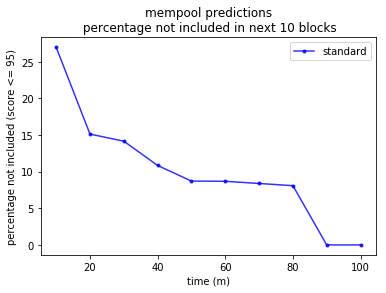

In [22]:
x1 = []
y1 = []
y2 = []
y3 = []
avg_blocktime = 10
colsStd = []
for idx in range(1, 11, 1):
    colsStd.append("scoreStandardPlus" + str(idx))
    percentage2 = getPercentage(colsStd)
    y2.append(percentage2)
    x1.append(idx * avg_blocktime)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x1, y2, alpha=0.8, c='b', marker='.', label='standard')

plt.xlabel('time (m)')
plt.ylabel('percentage not included (score <= 95)')
plt.title('mempool predictions\n percentage not included in next 10 blocks')
plt.legend(loc=1)